<a href="https://colab.research.google.com/github/jiveshwari/Knowledge_graphs/blob/main/NLP_Ambiguities_Lesk_Algorithm_for_checking_overlaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To adapt this notebook to your own needs** and to be able to edit it, please make a copy of your own. This works via "*File*" -> "*Save a copy ..*."


---



Some of the **Ambiguities** mentioned [in Sect. 2.5 of the ISE 2021 lecture](https://ise-fizkarlsruhe.github.io/ISE-teaching/materials/lecture/03-ISE2021-NLP2.pdf) are already implemented in the [python NLTK library.](https://www.nltk.org/) Please find some examples below.

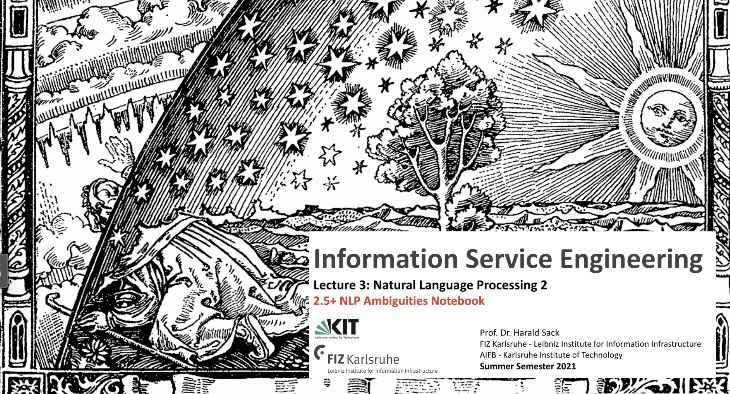
# Lexical Ambiguity
Polysemy vs. Homonymy. Here you can play around with [WordNet](https://wordnet.princeton.edu/).

Traditional approach to resolve Lexical Ambiguity: build a taxonomy, such as WordNet, that
provides a denotational definition of each word and represents their
interrelations in a hierarchical structure

A **Synset** is a set of one or more synonyms. WordNet is organized as hierarchies of synsets.
Example:[ Lookup WordNet for "star"](http://wordnetweb.princeton.edu/perl/webwn?s=star&sub=Search+WordNet&o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&h=)

In [1]:
#First we have to import nltk and download the wordnet package
import nltk
nltk.download('wordnet')

#Next we import wordnet from nltk
from nltk.corpus import wordnet as wn

#We can lookup a specific synset of a word
wn.synsets("star")

[nltk_data] Downloading package wordnet to /root/nltk_data...


[Synset('star.n.01'),
 Synset('ace.n.03'),
 Synset('star.n.03'),
 Synset('star.n.04'),
 Synset('star.n.05'),
 Synset('headliner.n.01'),
 Synset('asterisk.n.01'),
 Synset('star_topology.n.01'),
 Synset('star.v.01'),
 Synset('star.v.02'),
 Synset('star.v.03'),
 Synset('leading.s.01')]

In [2]:
#We can lookup the definition of a specific synset
wn.synset("star.n.03").definition()

'any celestial body visible (as a point of light) from the Earth at night'

In [3]:
# or lookup all definitions, lexical information and synonyms of a specific synset
i=0
for sense in wn.synsets("star"):
  i+=1
  print(i,sense.name(),": ",sense.lexname(),", ",sense.definition(),", ",sense.lemma_names())

1 star.n.01 :  noun.object ,  (astronomy) a celestial body of hot gases that radiates energy derived from thermonuclear reactions in the interior ,  ['star']
2 ace.n.03 :  noun.person ,  someone who is dazzlingly skilled in any field ,  ['ace', 'adept', 'champion', 'sensation', 'maven', 'mavin', 'virtuoso', 'genius', 'hotshot', 'star', 'superstar', 'whiz', 'whizz', 'wizard', 'wiz']
3 star.n.03 :  noun.object ,  any celestial body visible (as a point of light) from the Earth at night ,  ['star']
4 star.n.04 :  noun.person ,  an actor who plays a principal role ,  ['star', 'principal', 'lead']
5 star.n.05 :  noun.shape ,  a plane figure with 5 or more points; often used as an emblem ,  ['star']
6 headliner.n.01 :  noun.person ,  a performer who receives prominent billing ,  ['headliner', 'star']
7 asterisk.n.01 :  noun.communication ,  a star-shaped character * used in printing ,  ['asterisk', 'star']
8 star_topology.n.01 :  noun.cognition ,  the topology of a network whose components ar

In [4]:
#and we can lookup hypernyms for a given synset
star = wn.synset("star.n.03")
hypernyms = lambda s:s.hypernyms()
list(star.closure(hypernyms))

[Synset('celestial_body.n.01'),
 Synset('natural_object.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

# Tasks: Word Sense Disambiguation (WSD)
with WordNet.

Given a word and its context we want to automatically determine which of the WordNet senses is the context-appropriate?

`"The astronomer loves the star of the movie who plays the lead role"`

How to determine the correct synset for "`star`"?

**Idea**: Look for maximum overlap of sentence (context) with synset definition, as e.g. "an actor who **plays** a principal **role**"

*(A simple [Lesk algorithm](https://en.wikipedia.org/wiki/Lesk_algorithm), introduced by Michael E. Lesk in 1986)*

In [5]:
from nltk.corpus import wordnet as wn

#simple lesk algorithm
def lesk(sentence, ambiguous_word):
  max_overlaps = 0
  lesk_dictionary=[]
  lesk_sense = ""
  #the context are the single words of the sentence
  context = sentence.split()

  #for all synsets of ambiguous words
  for sense in wn.synsets(ambiguous_word):
    #split the definition into words
    lesk_dictionary += sense.definition().split()
    lesk_dictionary += sense.lemma_names()
    #count the overlaps between definition and sentence
    overlaps = set(lesk_dictionary).intersection(context)

    if len(overlaps) > max_overlaps:
      #the correct sense is the one with the highest overlap
      lesk_sense = sense
      max_overlaps = len(overlaps)     

  return lesk_sense
  
sentence1 = "The astronomer loves the star of the movie who plays the lead role"
ambiguous_word = 'star'

answer1 = lesk(sentence1, ambiguous_word)
print(answer1)
print(answer1.definition())

Synset('star.n.04')
an actor who plays a principal role


In [6]:
#try another sentence
sentence2 = "The astronomer loves the star that twinckles in the sky so bright"
ambiguous_word = 'star'

answer2 = lesk(sentence2, ambiguous_word)
print(answer2)
print(answer2.definition())

Synset('star.n.01')
(astronomy) a celestial body of hot gases that radiates energy derived from thermonuclear reactions in the interior


**More information on how to use WordNet with NLTK:**

*   Steven Bird, Ewan Klein, and Edward Loper: [Natural Language Processing with Python
– Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/), O'Reilly Media, 2009
> * Chap 2: [Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html), Section 5: WordNet



